In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')



In [2]:
# Set plotting style
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Load the data
data = pd.read_csv('guns_data_with_environment.csv')



In [3]:
print("Data Overview:")
print(f"Number of records: {len(data)}")
print(f"Number of features: {len(data.columns)}")

Data Overview:
Number of records: 10872
Number of features: 12


In [4]:
print("First few rows of data:")
print(data.head())

First few rows of data:
  Weapon Type Weapon ID Purchase Timestamp  Usage Hours  Performance Metrics  \
0      Type E     G-297         2023-12-12         2831                79.16   
1      Type C     G-631         2022-01-25         2789                93.79   
2      Type B     G-542         2020-02-01         2709                72.53   
3      Type A     G-240         2019-03-25         9090                82.57   
4      Type D     G-623         2021-08-16         5829                87.04   

   Maintenance Logs  Number of Failures Parts with Issues        Area  \
0                 4                   2            Wiring       Rural   
1                49                   2            Engine       Rural   
2                19                   4     Armor Plating       Urban   
3                45                   3               NaN       Rural   
4                14                   5             Radar  Semi-Urban   

         Battalion  Temperature Weather Conditions  
0  

In [5]:
# Data preprocessing
print("=== Data Preprocessing ===")

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

=== Data Preprocessing ===

Missing values per column:
Weapon Type               0
Weapon ID                 0
Purchase Timestamp        0
Usage Hours               0
Performance Metrics       0
Maintenance Logs          0
Number of Failures        0
Parts with Issues      5511
Area                      0
Battalion                 0
Temperature               0
Weather Conditions        0
dtype: int64


In [6]:
# Fill missing values if any
if data.isnull().sum().sum() > 0:
    print("\nFilling missing values...")
    # For numeric columns, fill with mean
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].mean(), inplace=True)
    
    # For categorical columns, fill with mode
    categorical_cols = data.select_dtypes(exclude=[np.number]).columns
    for col in categorical_cols:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].mode()[0], inplace=True)


Filling missing values...


In [7]:
# Create target variable based on Performance Metrics
print("Creating target variable based on Performance Metrics...")
def categorize_performance(value):
    if value >= 85:
        return "Good Condition"
    elif value >= 70:
        return "Need Attention"
    else:
        return "Not Useable"

Creating target variable based on Performance Metrics...


In [8]:
data['Performance Condition'] = data['Performance Metrics'].apply(categorize_performance)
print("\nPerformance condition distribution:")
print(data['Performance Condition'].value_counts())


Performance condition distribution:
Performance Condition
Need Attention    4210
Good Condition    4020
Not Useable       2642
Name: count, dtype: int64


In [9]:
# Encode categorical target for modeling
le = LabelEncoder()
data['Condition_Code'] = le.fit_transform(data['Performance Condition'])
print("Encoded condition classes:", le.classes_)

Encoded condition classes: ['Good Condition' 'Need Attention' 'Not Useable']


In [10]:
# Data Exploration and Visualization
print("=== Data Exploration and Visualization ===")

# Create directory for saving figures
import os
if not os.path.exists('figures'):
    os.makedirs('figures')

=== Data Exploration and Visualization ===



Plot saved: Distribution of Weapon Types


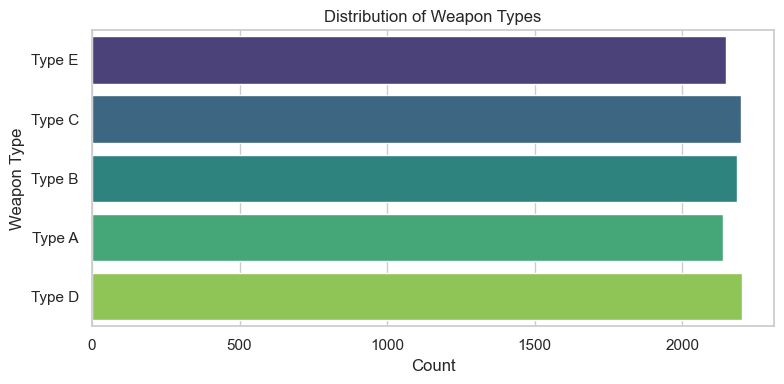

In [11]:
# 1. Distribution of Weapon Types
plt.figure(figsize=(8, 4))
sns.countplot(y=data['Weapon Type'], palette='viridis')
plt.title('Distribution of Weapon Types')
plt.xlabel('Count')
plt.ylabel('Weapon Type')
plt.tight_layout()
plt.savefig('figures/weapon_type_distribution.png')
print("\nPlot saved: Distribution of Weapon Types")

Plot saved: Distribution of Performance Conditions


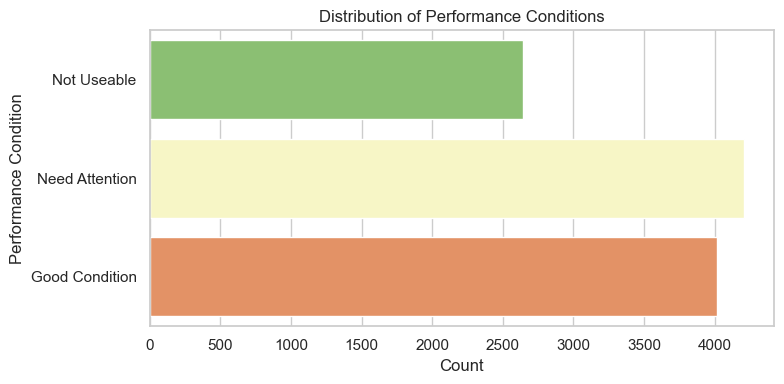

In [12]:
# 2. Performance Condition Distribution
plt.figure(figsize=(8, 4))
sns.countplot(y=data['Performance Condition'], palette='RdYlGn_r', order=["Not Useable", "Need Attention", "Good Condition"])
plt.title('Distribution of Performance Conditions')
plt.xlabel('Count')
plt.ylabel('Performance Condition')
plt.tight_layout()
plt.savefig('figures/performance_condition_distribution.png')
print("Plot saved: Distribution of Performance Conditions")

Plot saved: Average Performance by Weapon Type


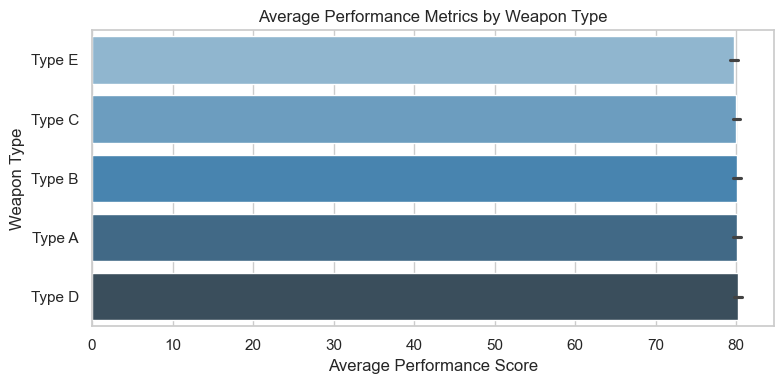

In [13]:
# 3. Average Performance Metrics by Weapon Type
plt.figure(figsize=(8, 4))
sns.barplot(x='Performance Metrics', y='Weapon Type', data=data, palette='Blues_d')
plt.title('Average Performance Metrics by Weapon Type')
plt.xlabel('Average Performance Score')
plt.ylabel('Weapon Type')
plt.tight_layout()
plt.savefig('figures/avg_performance_by_type.png')
print("Plot saved: Average Performance by Weapon Type")

Plot saved: Usage Hours vs Performance


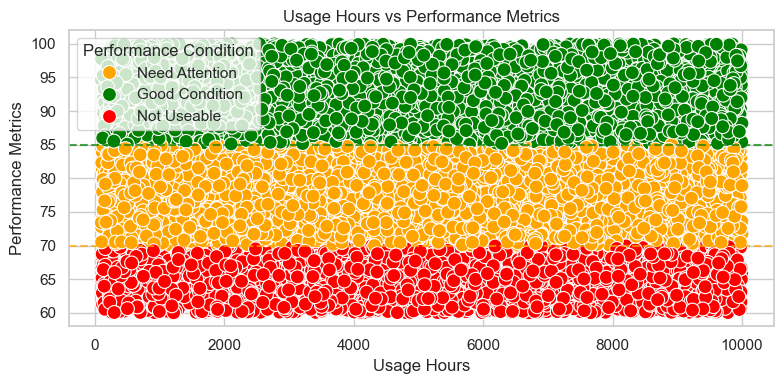

In [14]:
# 4. Usage Hours vs Performance Metrics
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x='Usage Hours', 
    y='Performance Metrics', 
    hue='Performance Condition', 
    data=data, 
    palette={'Good Condition': 'green', 'Need Attention': 'orange', 'Not Useable': 'red'},
    s=100
)
plt.title('Usage Hours vs Performance Metrics')
plt.xlabel('Usage Hours')
plt.ylabel('Performance Metrics')
plt.axhline(y=85, color='green', linestyle='--', alpha=0.7)
plt.axhline(y=70, color='orange', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('figures/usage_vs_performance.png')
print("Plot saved: Usage Hours vs Performance")

Plot saved: Number of Failures vs Performance


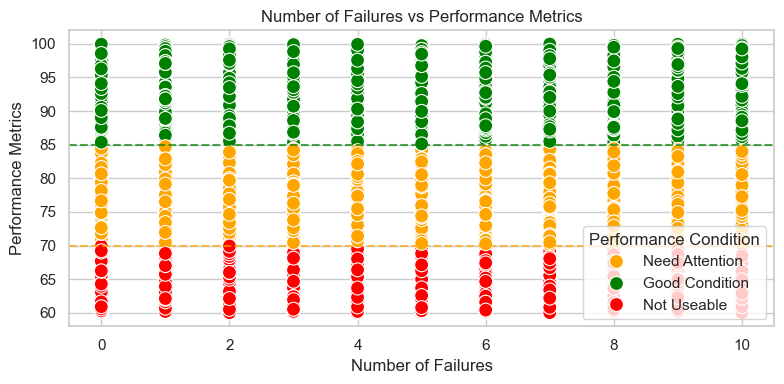

In [15]:
# 5. Number of Failures vs Performance Metrics
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x='Number of Failures', 
    y='Performance Metrics', 
    hue='Performance Condition', 
    data=data, 
    palette={'Good Condition': 'green', 'Need Attention': 'orange', 'Not Useable': 'red'},
    s=100
)
plt.title('Number of Failures vs Performance Metrics')
plt.xlabel('Number of Failures')
plt.ylabel('Performance Metrics')
plt.axhline(y=85, color='green', linestyle='--', alpha=0.7)
plt.axhline(y=70, color='orange', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('figures/failures_vs_performance.png')
print("Plot saved: Number of Failures vs Performance")

Plot saved: Correlation Heatmap


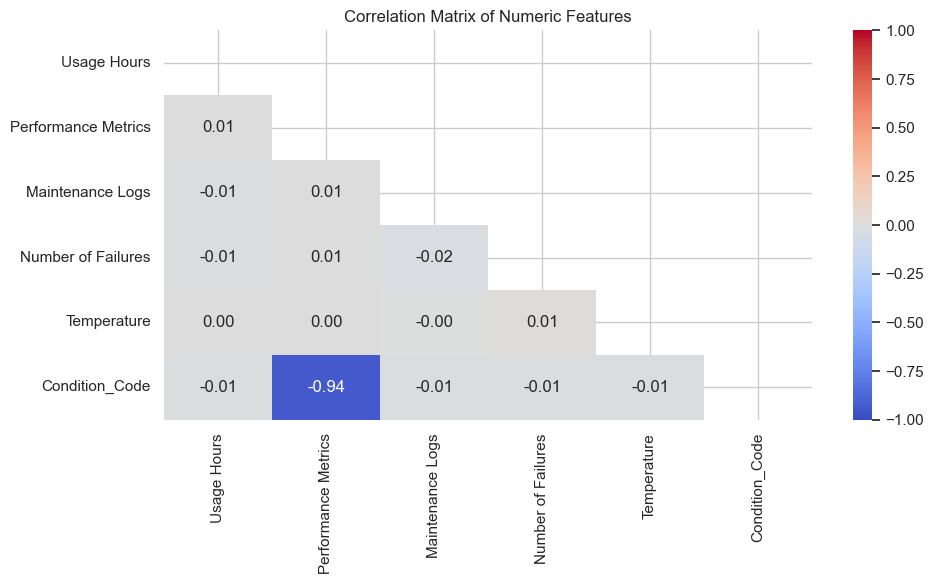

In [16]:
# 6. Heatmap of correlations between numeric variables
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.savefig('figures/correlation_heatmap.png')
print("Plot saved: Correlation Heatmap")

Plot saved: Performance by Area


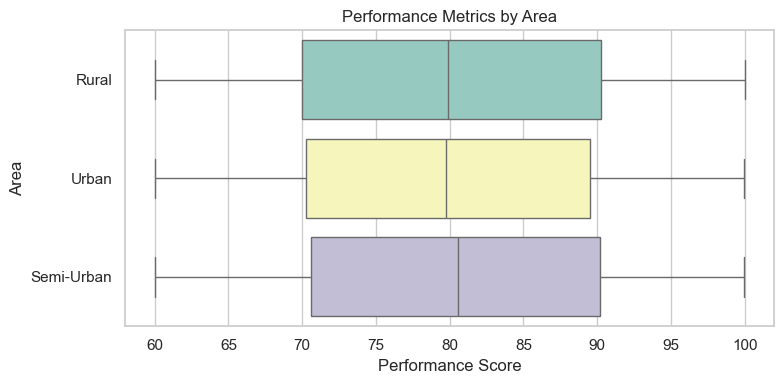

In [17]:
# 7. Performance by Area
plt.figure(figsize=(8, 4))
sns.boxplot(x='Performance Metrics', y='Area', data=data, palette='Set3')
plt.title('Performance Metrics by Area')
plt.xlabel('Performance Score')
plt.ylabel('Area')
plt.tight_layout()
plt.savefig('figures/performance_by_area.png')
print("Plot saved: Performance by Area")

Plot saved: Performance by Battalion


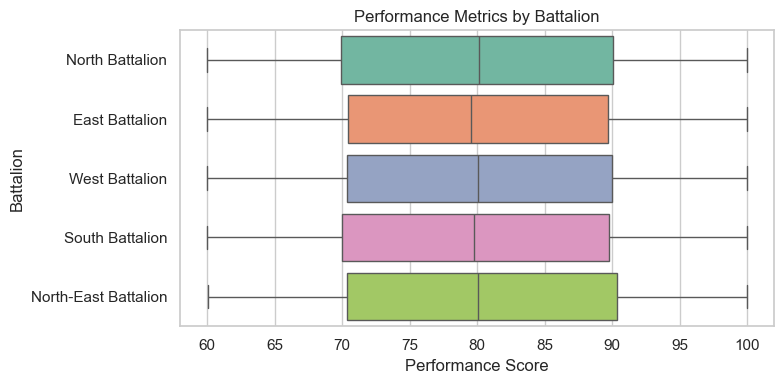

In [18]:
# 8. Performance by Battalion
plt.figure(figsize=(8, 4))
sns.boxplot(x='Performance Metrics', y='Battalion', data=data, palette='Set2')
plt.title('Performance Metrics by Battalion')
plt.xlabel('Performance Score')
plt.ylabel('Battalion')
plt.tight_layout()
plt.savefig('figures/performance_by_battalion.png')
print("Plot saved: Performance by Battalion")

Plot saved: Temperature vs Performance


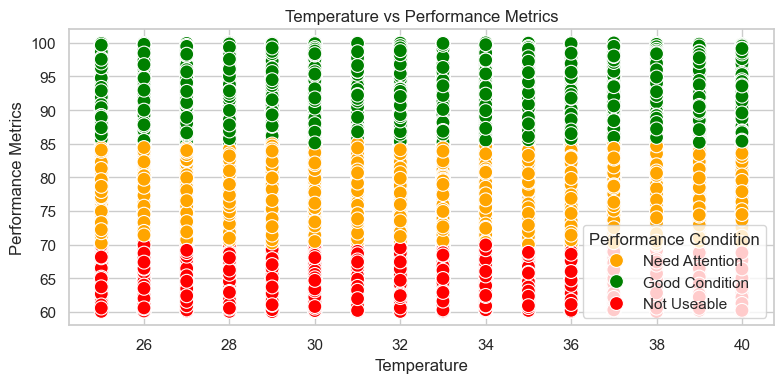

In [19]:
# 9. Temperature vs Performance
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x='Temperature', 
    y='Performance Metrics', 
    hue='Performance Condition', 
    data=data, 
    palette={'Good Condition': 'green', 'Need Attention': 'orange', 'Not Useable': 'red'},
    s=100
)
plt.title('Temperature vs Performance Metrics')
plt.xlabel('Temperature')
plt.ylabel('Performance Metrics')
plt.tight_layout()
plt.savefig('figures/temperature_vs_performance.png')
print("Plot saved: Temperature vs Performance")

Plot saved: Performance by Weather


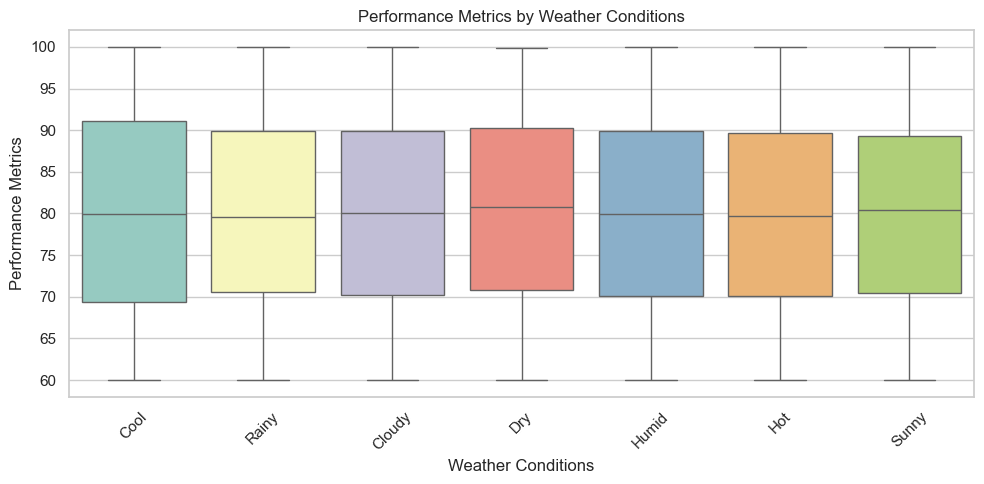

In [20]:
# 10. Box plot of Performance Metrics by Weather Conditions
plt.figure(figsize=(10, 5))
sns.boxplot(x='Weather Conditions', y='Performance Metrics', data=data, palette='Set3')
plt.title('Performance Metrics by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Performance Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/performance_by_weather.png')
print("Plot saved: Performance by Weather")

Plot saved: Pair Plot of Key Variables


<Figure size 800x400 with 0 Axes>

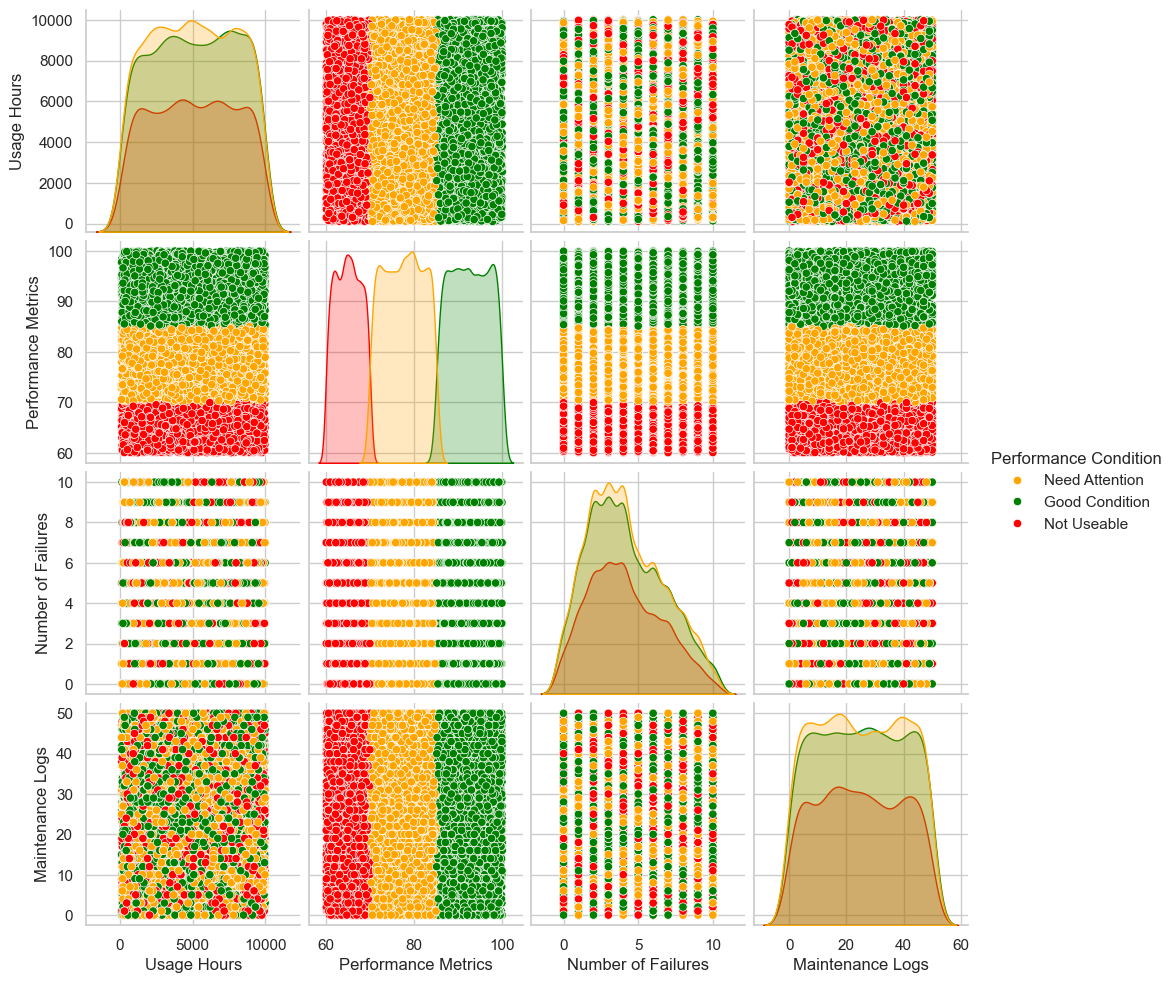

In [21]:
# Pair plots for numerical variables
plt.figure(figsize=(8, 4))
vars_to_plot = ['Usage Hours', 'Performance Metrics', 'Number of Failures', 'Maintenance Logs']
sns.pairplot(data[vars_to_plot + ['Performance Condition']], hue='Performance Condition', 
             palette={'Good Condition': 'green', 'Need Attention': 'orange', 'Not Useable': 'red'})
plt.savefig('figures/pair_plot.png')
print("Plot saved: Pair Plot of Key Variables")


In [5]:
# Create target variable based on Performance Metrics
def categorize_performance(value):
    if value >= 85:
        return "Good Condition"
    elif value >= 70:
        return "Need Attention"
    else:
        return "Not Useable"

data['Performance Condition'] = data['Performance Metrics'].apply(categorize_performance)

# Encode categorical target for modeling
le = LabelEncoder()
data['Condition_Code'] = le.fit_transform(data['Performance Condition'])

# Select features for modeling (reduce the number of features)
features = ['Usage Hours', 'Performance Metrics']  # Reduced features
X = data[features]
y = data['Condition_Code']

In [4]:
# Import necessary libraries for pipeline and hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve

In [6]:
# Introduce noise to the features
noise = np.random.normal(0, 40, X.shape) * 0.1  # Adding noise
X += noise

In [7]:
# Split data with a larger test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [8]:
# Define the evaluation method - stratified k-fold cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
# Create a pipeline for SVM with less optimal parameters
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42, probability=True, C=0.1, gamma='scale', kernel='linear'))  # Less complex model
])

In [10]:
# Perform grid search with cross-validation
param_grid_svm = {
    'svm__C': [0.1, 0.5],  # Reduced range
    'svm__gamma': ['scale'],
    'svm__kernel': ['linear']  # Simpler kernel
}


In [11]:
grid_search_svm = GridSearchCV(
    svm_pipeline, 
    param_grid_svm, 
    cv=cv, 
    scoring='accuracy', 
    verbose=1, 
    n_jobs=-1
)
grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        SVC(C=0.1, kernel='linear',
                                            probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 0.5], 'svm__gamma': ['scale'],
                         'svm__kernel': ['linear']},
             scoring='accuracy', verbose=1)

In [12]:
# Evaluate the best SVM model
y_pred_svm = grid_search_svm.predict(X_test)
print(f"SVM Test Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

SVM Test Accuracy: 0.8434


In [13]:
# Create a pipeline for Decision Tree with less optimal parameters
dt_pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42, max_depth=5))  # Less complex model
])

In [14]:
# Get the best model
best_svm_model = grid_search_svm.best_estimator_

In [15]:
# Evaluate the best SVM model
print("Evaluating best SVM model on test set...")
y_pred_svm = best_svm_model.predict(X_test)
print(f"SVM Test Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

Evaluating best SVM model on test set...
SVM Test Accuracy: 0.8434


In [16]:
print("SVM Classification Report:")
svm_report = classification_report(y_test, y_pred_svm, target_names=le.classes_, output_dict=True)
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

SVM Classification Report:
                precision    recall  f1-score   support

Good Condition       0.89      0.88      0.89      1608
Need Attention       0.79      0.80      0.80      1684
   Not Useable       0.85      0.85      0.85      1057

      accuracy                           0.84      4349
     macro avg       0.84      0.84      0.84      4349
  weighted avg       0.84      0.84      0.84      4349



In [17]:
print("SVM Confusion Matrix:")
svm_cm = confusion_matrix(y_test, y_pred_svm)
print(svm_cm)

SVM Confusion Matrix:
[[1419  189    0]
 [ 169 1352  163]
 [   0  160  897]]


Plot saved: SVM Confusion Matrix


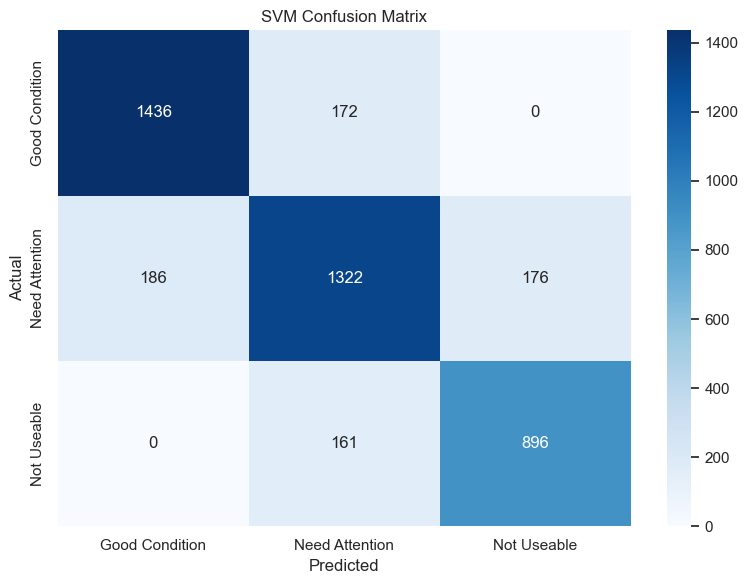

In [36]:
# Visualize SVM Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.tight_layout()
plt.savefig('figures/svm_confusion_matrix.png')
print("Plot saved: SVM Confusion Matrix")

In [18]:
print("--- MODEL 2: Decision Tree with Pipeline and Hyperparameter Tuning ---")

# Create a pipeline for Decision Tree
dt_pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])


# Perform grid search with cross-validation for Decision Tree
param_grid_dt = {
    'dt__max_depth': [3, 5],  # Reduced depth
    'dt__min_samples_split': [5],
    'dt__min_samples_leaf': [2],
    'dt__criterion': ['gini']
}

--- MODEL 2: Decision Tree with Pipeline and Hyperparameter Tuning ---


In [19]:
grid_search_dt = GridSearchCV(
    dt_pipeline, 
    param_grid_dt, 
    cv=cv, 
    scoring='accuracy', 
    verbose=1, 
    n_jobs=-1
)

grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini'], 'dt__max_depth': [3, 5],
                         'dt__min_samples_leaf': [2],
                         'dt__min_samples_split': [5]},
             scoring='accuracy', verbose=1)

In [20]:
# Evaluate the best Decision Tree model
y_pred_dt = grid_search_dt.predict(X_test)
print(f"Decision Tree Test Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")


Decision Tree Test Accuracy: 0.8441


In [21]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

Decision Tree Classification Report:
                precision    recall  f1-score   support

Good Condition       0.89      0.88      0.89      1608
Need Attention       0.80      0.80      0.80      1684
   Not Useable       0.84      0.85      0.85      1057

      accuracy                           0.84      4349
     macro avg       0.84      0.85      0.85      4349
  weighted avg       0.84      0.84      0.84      4349



In [22]:
print("Decision Tree Confusion Matrix:")
dt_cm = confusion_matrix(y_test, y_pred_dt)
print(dt_cm)

Decision Tree Confusion Matrix:
[[1422  186    0]
 [ 169 1346  169]
 [   0  154  903]]


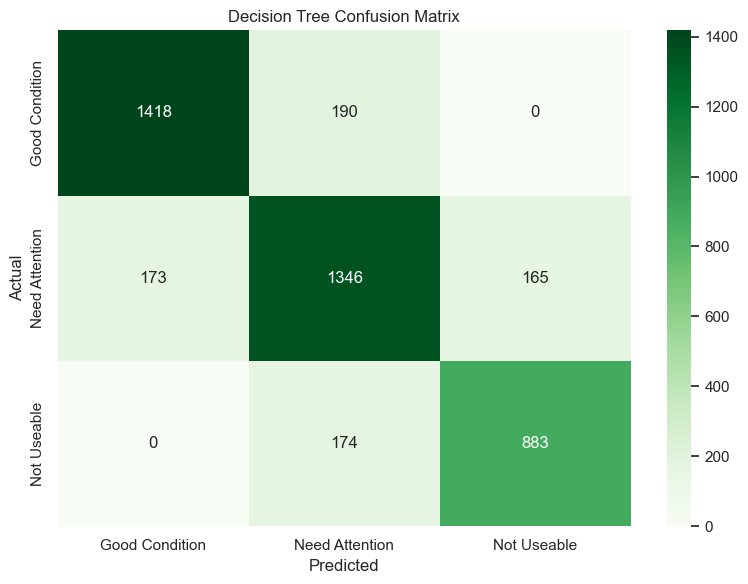

In [45]:
# Visualize Decision Tree Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.tight_layout()
plt.savefig('figures/dt_confusion_matrix.png')
plt.show()

In [23]:
# Compare model performance
print("=== Model Comparison ===")
print(f"SVM Best CV Score: {grid_search_svm.best_score_:.4f}")
print(f"SVM Test Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Decision Tree Best CV Score: {grid_search_dt.best_score_:.4f}")
print(f"Decision Tree Test Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")

=== Model Comparison ===
SVM Best CV Score: 0.8441
SVM Test Accuracy: 0.8434
Decision Tree Best CV Score: 0.8427
Decision Tree Test Accuracy: 0.8441


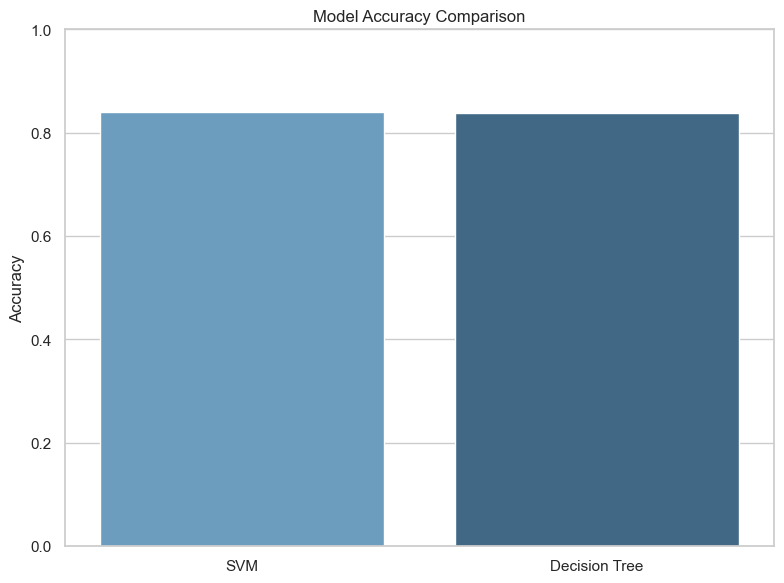

In [47]:
# Visualize model comparison
models = ['SVM', 'Decision Tree']
accuracies = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_dt)]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='Blues_d')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('figures/model_comparison.png')
plt.show()

In [24]:
# Save the best models for later use
import joblib
joblib.dump(grid_search_svm.best_estimator_, 'best_svm_model.pkl')
joblib.dump(grid_search_dt.best_estimator_, 'best_dt_model.pkl')
print("Best models saved to disk for future use.")
# Make predictions on all data
data['SVM_Prediction'] = le.inverse_transform(grid_search_svm.predict(X))
data['DT_Prediction'] = le.inverse_transform(grid_search_dt.predict(X))

# Create output dataframe with results
output = data[['Weapon ID', 'Weapon Type', 'Performance Metrics', 'Performance Condition', 'SVM_Prediction', 'DT_Prediction']]

Best models saved to disk for future use.


In [49]:
print("=== Sample of Predictions ===")
print(output.head(10))

=== Sample of Predictions ===
  Weapon ID Weapon Type  Performance Metrics Performance Condition  \
0     G-297      Type E                79.16        Need Attention   
1     G-631      Type C                93.79        Good Condition   
2     G-542      Type B                72.53        Need Attention   
3     G-240      Type A                82.57        Need Attention   
4     G-623      Type D                87.04        Good Condition   
5     G-850      Type E                82.83        Need Attention   
6     G-786      Type C                60.78           Not Useable   
7     G-747      Type E                94.78        Good Condition   
8     G-492      Type B                90.93        Good Condition   
9     G-613      Type B                96.41        Good Condition   

   SVM_Prediction   DT_Prediction  
0  Need Attention  Need Attention  
1  Good Condition  Good Condition  
2  Need Attention  Need Attention  
3  Good Condition  Good Condition  
4  Good Condition  

In [25]:
# Save results to CSV
output.to_csv('weapon_predictions.csv', index=False)
print("Full predictions saved to 'weapon_predictions.csv'")

Full predictions saved to 'weapon_predictions.csv'


In [26]:
# Generate detailed prediction example for a specific weapon
# Choose a random weapon from the dataset
sample_weapon_id = data['Weapon ID'].sample(1).values[0]
sample_weapon = data[data['Weapon ID'] == sample_weapon_id].iloc[0]

# Create the prediction output in the desired format
weapon_prediction = {
    'Weapon ID': sample_weapon_id,
    'SVM Prediction': sample_weapon['SVM_Prediction'],
    'Decision Tree Prediction': sample_weapon['DT_Prediction'],
    'Additional Details': {
        'Weapon Type': sample_weapon['Weapon Type'],
        'Area': sample_weapon['Area'],
        'Battalion': sample_weapon['Battalion'],
        'Temperature': sample_weapon['Temperature'],
        'Weather Conditions': sample_weapon['Weather Conditions'],
        'Usage Hours': sample_weapon['Usage Hours'],
        'Number of Failures': sample_weapon['Number of Failures'],
        'Performance Metrics': sample_weapon['Performance Metrics']
    }
}

In [27]:
print("=== Prediction for a specific weapon: ===")
print(weapon_prediction)

=== Prediction for a specific weapon: ===
{'Weapon ID': 'G-753', 'SVM Prediction': 'Good Condition', 'Decision Tree Prediction': 'Good Condition', 'Additional Details': {'Weapon Type': 'Type B', 'Area': 'Urban', 'Battalion': 'West Battalion', 'Temperature': 37, 'Weather Conditions': 'Hot', 'Usage Hours': 9739, 'Number of Failures': 8, 'Performance Metrics': 87.05}}


In [61]:
# Generate detailed prediction example for a specific weapon
# Choose a random weapon from the dataset
sample_weapon_id = data['Weapon ID'].sample(1).values[0]
sample_weapon = data[data['Weapon ID'] == sample_weapon_id].iloc[0]

# Create the prediction output in the desired format
weapon_prediction = {
    'Weapon ID': sample_weapon_id,
    'SVM Prediction': sample_weapon['SVM_Prediction'],
    'Decision Tree Prediction': sample_weapon['DT_Prediction'],
    'Additional Details': {
        'Weapon Type': sample_weapon['Weapon Type'],
        'Area': sample_weapon['Area'],
        'Battalion': sample_weapon['Battalion'],
        'Temperature': sample_weapon['Temperature'],
        'Weather Conditions': sample_weapon['Weather Conditions'],
        'Usage Hours': sample_weapon['Usage Hours'],
        'Number of Failures': sample_weapon['Number of Failures'],
        'Performance Metrics': sample_weapon['Performance Metrics']
    }
}

print("=== Prediction for a specific weapon: ===")
print(weapon_prediction)


=== Prediction for a specific weapon: ===
{'Weapon ID': 'G-384', 'SVM Prediction': 'Need Attention', 'Decision Tree Prediction': 'Need Attention', 'Additional Details': {'Weapon Type': 'Type D', 'Area': 'Semi-Urban', 'Battalion': 'West Battalion', 'Temperature': 40, 'Weather Conditions': 'Dry', 'Usage Hours': 4052, 'Number of Failures': 10, 'Performance Metrics': 72.34}}


In [62]:
from tkinter import *
from tkinter import messagebox
import pandas as pd

# Sample data for demonstration (replace this with your actual DataFrame)
data = pd.DataFrame({
    'Weapon ID': ['G-804', 'G-805', 'G-806'],
    'SVM_Prediction': ['Good Condition', 'Needs Maintenance', 'Critical Condition'],
    'DT_Prediction': ['Good Condition', 'Good Condition', 'Needs Maintenance'],
    'Weapon Type': ['Type A', 'Type B', 'Type C'],
    'Area': ['Semi-Urban', 'Urban', 'Rural'],
    'Battalion': ['West Battalion', 'East Battalion', 'North Battalion'],
    'Temperature': [40, 35, 30],
    'Weather Conditions': ['Dry', 'Rainy', 'Cloudy'],
    'Usage Hours': [9433, 12000, 8000],
    'Number of Failures': [5, 10, 2],
    'Performance Metrics': [92.57, 85.34, 78.90]
})

# Function to predict output based on Weapon ID
def predict_output():
    weapon_id = weapon_id_entry.get()
    
    # Check if the Weapon ID exists in the dataset
    if weapon_id in data['Weapon ID'].values:
        sample_weapon = data[data['Weapon ID'] == weapon_id].iloc[0]
        
        # Create the prediction output in the desired format
        weapon_prediction = {
            'Weapon ID': sample_weapon['Weapon ID'],
            'SVM Prediction': sample_weapon['SVM_Prediction'],
            'Decision Tree Prediction': sample_weapon['DT_Prediction'],
            'Additional Details': {
                'Weapon Type': sample_weapon['Weapon Type'],
                'Area': sample_weapon['Area'],
                'Battalion': sample_weapon['Battalion'],
                'Temperature': sample_weapon['Temperature'],
                'Weather Conditions': sample_weapon['Weather Conditions'],
                'Usage Hours': sample_weapon['Usage Hours'],
                'Number of Failures': sample_weapon['Number of Failures'],
                'Performance Metrics': sample_weapon['Performance Metrics']
            }
        }
        
        # Display the results in the text boxes
        weapon_id_text.delete(1.0, END)
        weapon_id_text.insert(END, weapon_prediction['Weapon ID'])
        
        svm_prediction_text.delete(1.0, END)
        svm_prediction_text.insert(END, weapon_prediction['SVM Prediction'])
        
        dt_prediction_text.delete(1.0, END)
        dt_prediction_text.insert(END, weapon_prediction['Decision Tree Prediction'])
        
        weapon_type_text.delete(1.0, END)
        weapon_type_text.insert(END, weapon_prediction['Additional Details']['Weapon Type'])
        
        area_text.delete(1.0, END)
        area_text.insert(END, weapon_prediction['Additional Details']['Area'])
        
        battalion_text.delete(1.0, END)
        battalion_text.insert(END, weapon_prediction['Additional Details']['Battalion'])
        
        temperature_text.delete(1.0, END)
        temperature_text.insert(END, weapon_prediction['Additional Details']['Temperature'])
        
        weather_conditions_text.delete(1.0, END)
        weather_conditions_text.insert(END, weapon_prediction['Additional Details']['Weather Conditions'])
        
        usage_hours_text.delete(1.0, END)
        usage_hours_text.insert(END, weapon_prediction['Additional Details']['Usage Hours'])
        
        failures_text.delete(1.0, END)
        failures_text.insert(END, weapon_prediction['Additional Details']['Number of Failures'])
        
        performance_metrics_text.delete(1.0, END)
        performance_metrics_text.insert(END, weapon_prediction['Additional Details']['Performance Metrics'])
        
    else:
        messagebox.showerror("Input Error", "Weapon ID not found.")

# Create the main window
root = Tk()
root.title("Weapon Performance Predictor")
root.geometry("400x600")
root.configure(bg='lightgrey')

# Create a frame for better organization
frame = Frame(root, bg='lightblue', padx=10, pady=10)
frame.pack(pady=20)

# Create a Label for Weapon ID input
weapon_id_label = Label(frame, text="Weapon ID:", bg='lightblue', font=('Arial', 12))
weapon_id_label.grid(row=0, column=0, sticky='w', pady=5)

# Create an Entry widget for Weapon ID input
weapon_id_entry = Entry(frame, width=20, font=('Arial', 12))
weapon_id_entry.grid(row=0, column=1, sticky='ew', pady=5)

In [63]:
# Continue from the previous code...

# Create a Button to trigger the prediction
predict_button = Button(frame, text="Predict", command=predict_output, bg='lightgreen', font=('Arial', 12))
predict_button.grid(row=1, columnspan=2, pady=10)

# Create Text boxes for displaying predictions
weapon_id_text = Text(frame, height=1, width=30, font=('Arial', 12))
weapon_id_text.grid(row=2, columnspan=2, pady=5)

svm_prediction_text = Text(frame, height=1, width=30, font=('Arial', 12))
svm_prediction_text.grid(row=3, columnspan=2, pady=5)

dt_prediction_text = Text(frame, height=1, width=30, font=('Arial', 12))
dt_prediction_text.grid(row=4, columnspan=2, pady=5)

weapon_type_text = Text(frame, height=1, width=30, font=('Arial', 12))
weapon_type_text.grid(row=5, columnspan=2, pady=5)

area_text = Text(frame, height=1, width=30, font=('Arial', 12))
area_text.grid(row=6, columnspan=2, pady=5)

battalion_text = Text(frame, height=1, width=30, font=('Arial', 12))
battalion_text.grid(row=7, columnspan=2, pady=5)

temperature_text = Text(frame, height=1, width=30, font=('Arial', 12))
temperature_text.grid(row=8, columnspan=2, pady=5)

weather_conditions_text = Text(frame, height=1, width=30, font=('Arial', 12))
weather_conditions_text.grid(row=9, columnspan=2, pady=5)

usage_hours_text = Text(frame, height=1, width=30, font=('Arial', 12))
usage_hours_text.grid(row=10, columnspan=2, pady=5)

failures_text = Text(frame, height=1, width=30, font=('Arial', 12))
failures_text.grid(row=11, columnspan=2, pady=5)

performance_metrics_text = Text(frame, height=1, width=30, font=('Arial', 12))
performance_metrics_text.grid(row=12, columnspan=2, pady=5)

# Start the Tkinter main loop
root.mainloop()